In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cardio-vascular--ACWData-1.csv')

#keep a copy of df:
initial_df = df.copy()

df

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.473452,198992,CVA,yes,yes,yes,yes,no,89.0,100,Risk
1,0.218756,253100,CVA,no,no,no,no,no,67.0,100,NoRisk
2,0.131260,155737,CVA,no,yes,yes,no,no,79.0,20,NoRisk
3,0.102954,251222,A-F,no,yes,no,no,no,69.0,40,NoRisk
4,0.236142,197183,CVA,no,no,no,no,no,89.0,30,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.587315,113117,Asx,no,yes,yes,yes,no,74.0,100,Risk
1516,0.932265,103595,CVA,no,yes,yes,no,no,84.0,50,NoRisk
1517,0.876531,211309,CVA,no,no,yes,no,no,76.0,20,NoRisk
1518,0.812032,116379,TIA,no,no,yes,yes,no,75.0,35,NoRisk


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Random        1520 non-null   float64
 1   Id            1520 non-null   int64  
 2   Indication    1517 non-null   object 
 3   Diabetes      1518 non-null   object 
 4   IHD           1520 non-null   object 
 5   Hypertension  1517 non-null   object 
 6   Arrhythmia    1520 non-null   object 
 7   History       1518 non-null   object 
 8   IPSI          1516 non-null   float64
 9   Contra        1520 non-null   object 
 10  label         1517 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 130.8+ KB


# Check for unexpected values

In [4]:
for column in df.columns:
    value_counts = df[column].value_counts()
    print(value_counts)

0.576376    4
0.506731    4
0.683789    4
0.900209    4
0.004209    3
           ..
0.722614    1
0.592967    1
0.597341    1
0.521704    1
0.517688    1
Name: Random, Length: 1222, dtype: int64
198992    1
204351    1
185911    1
104391    1
234251    1
         ..
288937    1
95761     1
141764    1
120667    1
172848    1
Name: Id, Length: 1520, dtype: int64
A-F    493
CVA    416
TIA    390
ASx    186
Asx     32
Name: Indication, dtype: int64
no     1441
yes      77
Name: Diabetes, dtype: int64
no     801
yes    719
Name: IHD, dtype: int64
no     784
yes    733
Name: Hypertension, dtype: int64
no     1190
yes     330
Name: Arrhythmia, dtype: int64
no     1494
yes      24
Name: History, dtype: int64
69.0    231
74.0    222
79.0    188
89.0    175
94.0    157
72.0     83
84.0     77
75.0     75
77.0     50
67.0     32
98.0     31
59.0     29
80.0     28
81.0     25
49.0     23
64.0     14
78.0     13
70.0     13
76.0      9
54.0      9
50.0      7
73.0      7
96.0      7
68.0      3
6

On quick inspection, the following can be observed:
=========

There are as many unique values in Id as there are rows, which means that no patient has been taken into account twice, which is good;

In **'Indication'** there are two different ways in which Asx is inputed, "ASx" and "Asx"; 
There are also 3 missing values for this column, so this has to be taken care of;

Two missing values in **'Diabetes'**;

Three missing values in **'Hypertension'**;

Two missing values in **'History'**, with high discrepancy towards 'no' -> could be filled in with 'no';

Four missing values for **'IPSI'**. Varied amounts for varied values. Since I have no understanding about the impact of this value, those records should probably be dismissed.

Everything is fine until we reach the **'Contra'** column, where we encounter a missing value, which has to be taken care of;


In the **label** column, 2 outcomes are unknown and another 3 are null so these **lines should be removed** since they do not provide any meaningful value.

## Replacing all 'Asx' with 'ASx' to prepare 'Indication' for one-hot encoding:

In [5]:
df['Indication']=df['Indication'].replace({'Asx':'ASx'})
print(df['Indication'].value_counts())

A-F    493
CVA    416
TIA    390
ASx    218
Name: Indication, dtype: int64


### That one non-null, ' ' value in 'Contra' should be replaced by the median

In [6]:
df.replace(' ', pd.NA, inplace=True)
column_name = 'Contra' 
df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

# Calculate and print the median value of the column
column_median = df[column_name].mean()
print("Median value in '{}' column: {}".format(column_name, column_median))

Median value in 'Contra' column: 56.82817643186307


# Drop the 5 rows where label is not Risk/NoRisk (1/0)

In [7]:
# we could also drop 'Random' and 'Id' columns since they dont provide useful information
df=df.drop(columns=['Random','Id'])

df.dropna(subset=['label'], inplace=True)
# drop those 2 'Unknown' values as well since they do not help with training/testing
df=df[df['label']!='Unknown']
df.info
for column in df.columns:
    value_counts = df[column].value_counts()
    print(value_counts)

A-F    493
CVA    413
TIA    389
ASx    217
Name: Indication, dtype: int64
no     1437
yes      76
Name: Diabetes, dtype: int64
no     799
yes    716
Name: IHD, dtype: int64
no     783
yes    729
Name: Hypertension, dtype: int64
no     1187
yes     328
Name: Arrhythmia, dtype: int64
no     1490
yes      23
Name: History, dtype: int64
69.0    230
74.0    222
79.0    187
89.0    174
94.0    156
72.0     83
84.0     77
75.0     74
77.0     50
67.0     32
98.0     31
59.0     29
80.0     28
81.0     25
49.0     23
64.0     14
78.0     13
70.0     13
76.0      9
54.0      9
50.0      7
73.0      7
96.0      7
68.0      3
66.0      2
83.0      2
71.0      2
34.0      1
97.0      1
Name: IPSI, dtype: int64
100.0    282
20.0     192
50.0     184
30.0     163
40.0     110
60.0      99
75.0      61
80.0      53
70.0      52
10.0      50
90.0      45
85.0      35
95.0      32
25.0      30
35.0      27
55.0      22
15.0      18
65.0      17
51.0      11
53.0       9
73.0       7
45.0       6
16.0 

# Imputing missing values:

Imputing yes/no values with mode preserves dominant class, avoids bias and, well, it is simple.

In [8]:
from sklearn.impute import SimpleImputer

#create mode imputer for yes/no columns
imputer = SimpleImputer(strategy ='most_frequent')
df[['Indication', 'Diabetes', 'IHD', 'Hypertension', 'Arrhythmia','History']]=imputer.fit_transform(df[['Indication','Diabetes', 'IHD', 'Hypertension', 'Arrhythmia','History']])

#create median imputer for 'IPSI'
imputer = SimpleImputer(strategy ='median')
df[['Contra','IPSI']]=imputer.fit_transform(df[['Contra', 'IPSI']])

#check for null values now
print(df.isnull().sum())

Indication      0
Diabetes        0
IHD             0
Hypertension    0
Arrhythmia      0
History         0
IPSI            0
Contra          0
label           0
dtype: int64


## One-hot encoding for 'Indication', label encoding for 'label' and no for the rest of the categorical columns (the ones with yes/no):

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

ohe = OneHotEncoder()
feature_encoded = ohe.fit_transform(df[['Indication']]).toarray()
categories = ohe.categories_[0]
columns_encoded = [f'Indication_{category}' for category in categories]
df_encoded = pd.concat([df, pd.DataFrame(feature_encoded, columns=columns_encoded)], axis=1)

# drop original 'Indication' column
df_encoded.drop(columns = ['Indication'], inplace=True)

In [10]:
# remove '2' and '3' from label since they are something other than 0 or 1
df_encoded= df_encoded[df_encoded['label']!=2]
df_encoded= df_encoded[df_encoded['label']!=3]

# drop those 5 NaN rows.
df_encoded.dropna(inplace=True)
#check for null values again to make sure
print(df_encoded.isnull().sum())


for column in df_encoded.columns:
    value_counts = df_encoded[column].value_counts()
    print(value_counts)

Diabetes          0
IHD               0
Hypertension      0
Arrhythmia        0
History           0
IPSI              0
Contra            0
label             0
Indication_A-F    0
Indication_ASx    0
Indication_CVA    0
Indication_TIA    0
dtype: int64
no     1434
yes      76
Name: Diabetes, dtype: int64
no     796
yes    714
Name: IHD, dtype: int64
no     785
yes    725
Name: Hypertension, dtype: int64
no     1184
yes     326
Name: Arrhythmia, dtype: int64
no     1487
yes      23
Name: History, dtype: int64
69.0    230
74.0    221
79.0    187
89.0    174
94.0    156
72.0     83
84.0     76
75.0     73
77.0     50
67.0     32
98.0     31
59.0     29
80.0     28
81.0     24
49.0     23
64.0     14
78.0     13
70.0     13
76.0     12
54.0      9
50.0      7
73.0      7
96.0      7
68.0      3
66.0      2
83.0      2
71.0      2
34.0      1
97.0      1
Name: IPSI, dtype: int64
100.0    281
20.0     191
50.0     184
30.0     162
40.0     110
60.0      99
75.0      61
80.0      53
70.0     

In [11]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1510 entries, 0 to 1514
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diabetes        1510 non-null   object 
 1   IHD             1510 non-null   object 
 2   Hypertension    1510 non-null   object 
 3   Arrhythmia      1510 non-null   object 
 4   History         1510 non-null   object 
 5   IPSI            1510 non-null   float64
 6   Contra          1510 non-null   float64
 7   label           1510 non-null   float64
 8   Indication_A-F  1510 non-null   float64
 9   Indication_ASx  1510 non-null   float64
 10  Indication_CVA  1510 non-null   float64
 11  Indication_TIA  1510 non-null   float64
dtypes: float64(7), object(5)
memory usage: 153.4+ KB


# Now that there are no null values left, turn yes/no into 1/0

In [12]:
yes_no_columns = ['Diabetes', 'IHD', 'Hypertension', 'Arrhythmia', 'History']  # Replace with the actual column names
df_encoded[yes_no_columns] = df_encoded[yes_no_columns].replace({'yes': 1, 'no': 0})

In [13]:
for column in df_encoded.columns:
    value_counts = df_encoded[column].value_counts()
    print(value_counts)

0    1434
1      76
Name: Diabetes, dtype: int64
0    796
1    714
Name: IHD, dtype: int64
0    785
1    725
Name: Hypertension, dtype: int64
0    1184
1     326
Name: Arrhythmia, dtype: int64
0    1487
1      23
Name: History, dtype: int64
69.0    230
74.0    221
79.0    187
89.0    174
94.0    156
72.0     83
84.0     76
75.0     73
77.0     50
67.0     32
98.0     31
59.0     29
80.0     28
81.0     24
49.0     23
64.0     14
78.0     13
70.0     13
76.0     12
54.0      9
50.0      7
73.0      7
96.0      7
68.0      3
66.0      2
83.0      2
71.0      2
34.0      1
97.0      1
Name: IPSI, dtype: int64
100.0    281
20.0     191
50.0     184
30.0     162
40.0     110
60.0      99
75.0      61
80.0      53
70.0      52
10.0      50
90.0      45
85.0      35
95.0      32
25.0      30
35.0      26
55.0      22
15.0      18
65.0      17
51.0      11
53.0       9
73.0       7
45.0       6
16.0       4
62.0       3
79.0       2
Name: Contra, dtype: int64
0.0    1004
1.0     506
Name: labe

# Now the dataframe should be clean and ready to be split in X and y
X is the feature matrix and y is the target label. Each of these will be split into train and test data.
Support Vector Machines are better used when the data has higher dimensions, which is not the case now.
Decision Trees would be a good choice, but this problem looks like a K-Fold + Linear Regression would be the better fit.

E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[205   1]
 [ 10  86]]
0.9635761589403974


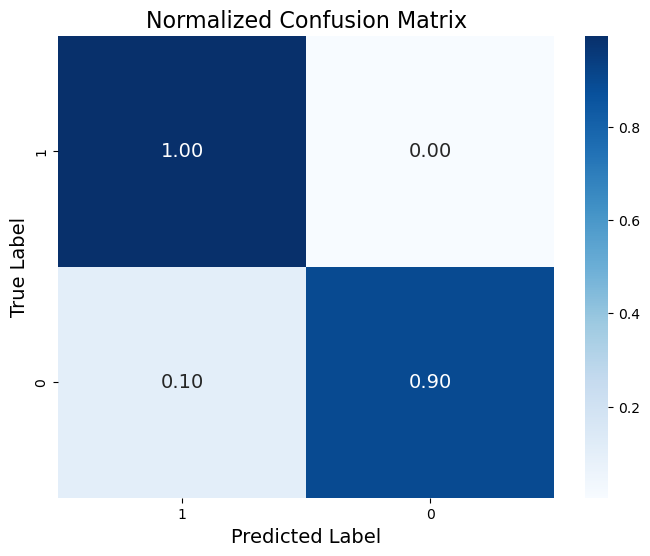

E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[189   9]
 [  8  96]]
0.9437086092715232


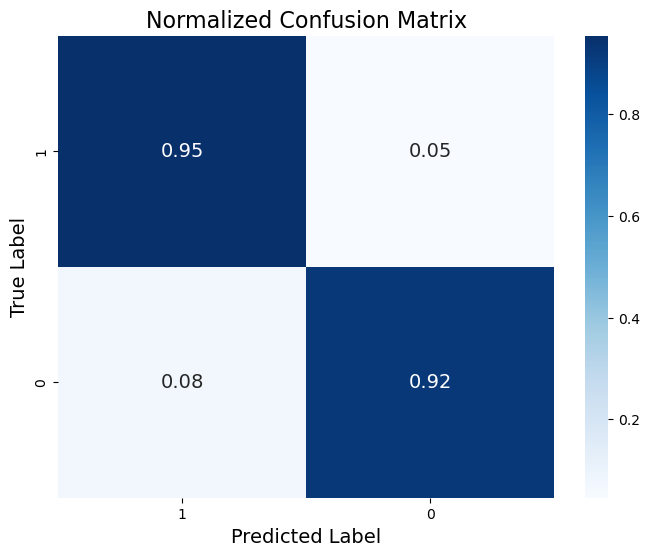

E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[210   6]
 [  6  80]]
0.9602649006622517


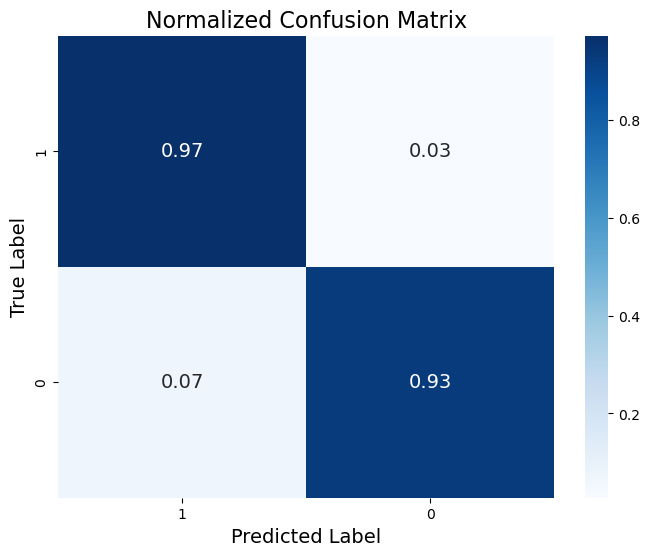

E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[189   3]
 [ 15  95]]
0.9403973509933775


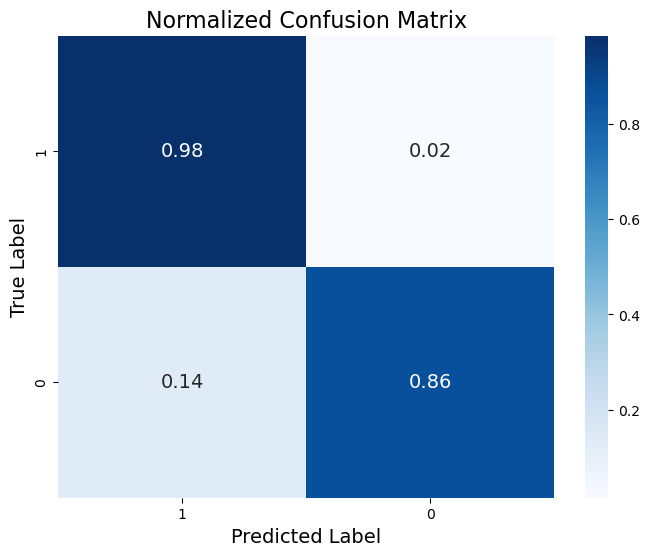

E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[186   6]
 [ 11  99]]
0.9437086092715232


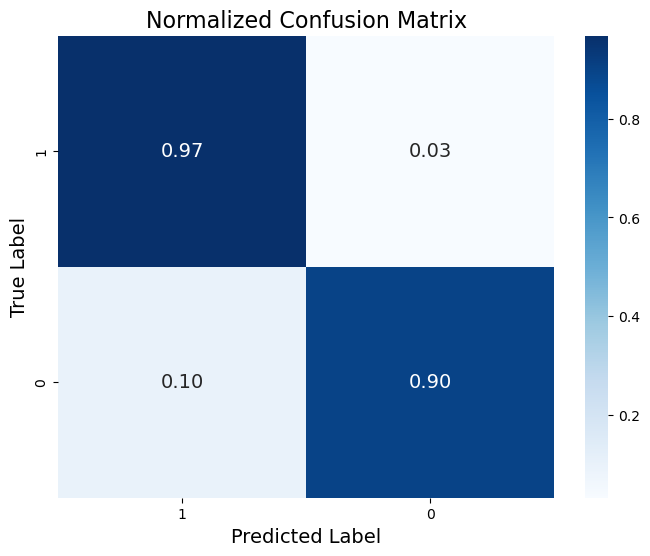

Average Accuracy: 0.95
Standard Deviation of Accuracy: 0.01


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X = df_encoded.drop(columns=['label']) 
y = df_encoded['label']

# 5 folds for cross-validation
k = 5

# initialize KFold cross-validator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_scores = []

# perform K-Fold Cross-Validation (each split will be 80-20)
for train_index, test_index in kf.split(X):
    # Get the training and test sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize the model (logistic regression here)
    model = LogisticRegression()

    # Train the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the evaluation metric (accuracy) for this fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    print(accuracy)
    
    normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

    # Create a DataFrame from the normalized confusion matrix
    classes = df['label'].unique()  # Replace 'target_column' with the actual name of your target column
    df_normalized_conf_matrix = pd.DataFrame(normalized_conf_matrix, index=classes, columns=classes)

    # Create a heatmap using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_normalized_conf_matrix, annot=True, cmap='Blues', fmt='.2f', annot_kws={"size": 14})
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.title('Normalized Confusion Matrix', fontsize=16)
    plt.show()
    
    
    

# This should print for each split, the confusion matrice with the actual non-normalised numbers in them,
# the accuracy for that split and plot the visual confusion matrice, this time normalised.

# Calculate the average and standard deviation of the evaluation metric across all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
std_dev_accuracy = pd.Series(accuracy_scores).std()

# Print the results
print("Average Accuracy: {:.2f}".format(average_accuracy))
print("Standard Deviation of Accuracy: {:.2f}".format(std_dev_accuracy))

# Interpreting these confusion matrices
## First, these accuracy scores almost look too good to be true. Same for the rate of FN

Because of the nature of the thing we want to predict, it is more important to have few false negatives (which means to predict that a pacient is not as risk, when they actually are at risk) and it is more acceptable to have a higher level of false positives (which is to predict that a pacient is at risk when they are not). In one case their life is at risk, in the other it is literally just a false alarm.

### It might be best to not be overconfident in the model that we choose, so we should probably pick the 3rd model since it might be more realistic than the ones that have 0 for FN or extremely high accuracy.

# Deployment:
There is no actual deployment phase in scope of this project. Producing the final report can be seen as deployment.
# !This only works if 'cardio-vascular--ACWData-1.csv' is in the same folder!